In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'numpy'

In [9]:
df = pd.read_csv("data/ntcdata.csv")
print(df.head())


   #        Date    LTP  % Change   High    Low   Open    Qty.       Turnover
0  1  2024/06/30  809.0     -0.48  879.7  802.0  802.0  24,459  19,869,915.20
1  2  2024/06/27  812.9      0.00  816.9  803.0  805.0  27,286  22,058,438.30
2  3  2024/06/26  812.9     -0.56  833.8  800.0  833.8  43,828  35,351,272.40
3  4  2024/06/25  817.5      0.06  820.9  810.0  817.0  20,410  16,670,080.00
4  5  2024/06/24  817.0      0.12    820  802.6  815.0  41,486  33,689,031.80


In [10]:
df.tail()


,#,Date,LTP,% Change,High,Low,Open,Qty.,Turnover
295,296,2023/03/23,811.0,-1.04,819.9,810.0,815.0,"10,763","8,758,774.00"
296,297,2023/03/22,819.5,-0.30,833.9,813.4,830.0,"11,790","9,697,738.00"
297,298,2023/03/20,822.0,0.61,828.9,818.0,828.9,"5,523","4,534,832.90"
298,299,2023/03/19,817.0,0.15,826,814.0,816.0,"8,415","6,891,176.30"
299,300,2023/03/16,815.8,0.10,819,812.2,818.0,"8,860","7,223,123.90"


In [11]:
df = df.iloc[:,1:]

In [13]:
df.head(10)

,Date,LTP,% Change,High,Low,Open,Qty.,Turnover
0,2024/06/30,809.0,-0.48,879.7,802.0,802.0,"24,459","19,869,915.20"
1,2024/06/27,812.9,0.00,816.9,803.0,805.0,"27,286","22,058,438.30"
2,2024/06/26,812.9,-0.56,833.8,800.0,833.8,"43,828","35,351,272.40"
3,2024/06/25,817.5,0.06,820.9,810.0,817.0,"20,410","16,670,080.00"
4,2024/06/24,817.0,0.12,820,802.6,815.0,"41,486","33,689,031.80"
5,2024/06/23,816.0,-0.11,870.1,800.0,821.0,"69,427","56,268,687.70"
6,2024/06/20,816.9,-0.62,838.4,809.1,838.4,"63,408","51,616,474.70"
7,2024/06/19,822.0,0.24,828.9,821.0,828.0,"10,020","8,261,408.20"
8,2024/06/18,820.0,-1.20,834.9,815.0,829.0,"43,044","35,380,128.50"
9,2024/06/16,830.0,-0.35,846,823.0,846.0,"36,497","30,212,108.50"


## Data cleaning and preprocessing

In [14]:
#removing null values
df.isnull().sum()

Date        0
LTP         0
% Change    0
High        0
Low         0
Open        0
Qty.        0
Turnover    0
dtype: int64

In [15]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [16]:
df

,Date,LTP,% Change,High,Low,Open,Qty.,Turnover
0,2024/06/30,809.0,-0.48,879.7,802.0,802.0,"24,459","19,869,915.20"
1,2024/06/27,812.9,0.00,816.9,803.0,805.0,"27,286","22,058,438.30"
2,2024/06/26,812.9,-0.56,833.8,800.0,833.8,"43,828","35,351,272.40"
3,2024/06/25,817.5,0.06,820.9,810.0,817.0,"20,410","16,670,080.00"
4,2024/06/24,817.0,0.12,820,802.6,815.0,"41,486","33,689,031.80"
...,...,...,...,...,...,...,...,...
295,2023/03/23,811.0,-1.04,819.9,810.0,815.0,"10,763","8,758,774.00"
296,2023/03/22,819.5,-0.30,833.9,813.4,830.0,"11,790","9,697,738.00"
297,2023/03/20,822.0,0.61,828.9,818.0,828.9,"5,523","4,534,832.90"
298,2023/03/19,817.0,0.15,826,814.0,816.0,"8,415","6,891,176.30"


In [17]:
df = df.drop(columns=["LTP","% Change","High","Low","Qty.","Turnover"])
df.head()

,Date,Open
0,2024/06/30,802.0
1,2024/06/27,805.0
2,2024/06/26,833.8
3,2024/06/25,817.0
4,2024/06/24,815.0


In [31]:
print(df['Date'].max())
print(df['Date'].min())

2024/06/30
2023/03/16


In [38]:
# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
df.set_index('Date', inplace=True)

In [39]:
df

,Open
Date,
2024-06-30,802.0
2024-06-27,805.0
2024-06-26,833.8
2024-06-25,817.0
2024-06-24,815.0
...,...
2023-03-23,815.0
2023-03-22,830.0
2023-03-20,828.9


In [43]:
df.sort_index(inplace=True)

In [44]:
df

,Open
Date,
2023-03-16,818.0
2023-03-19,816.0
2023-03-20,828.9
2023-03-22,830.0
2023-03-23,815.0
...,...
2024-06-24,815.0
2024-06-25,817.0
2024-06-26,833.8


Text(0.5, 0, 'Time')

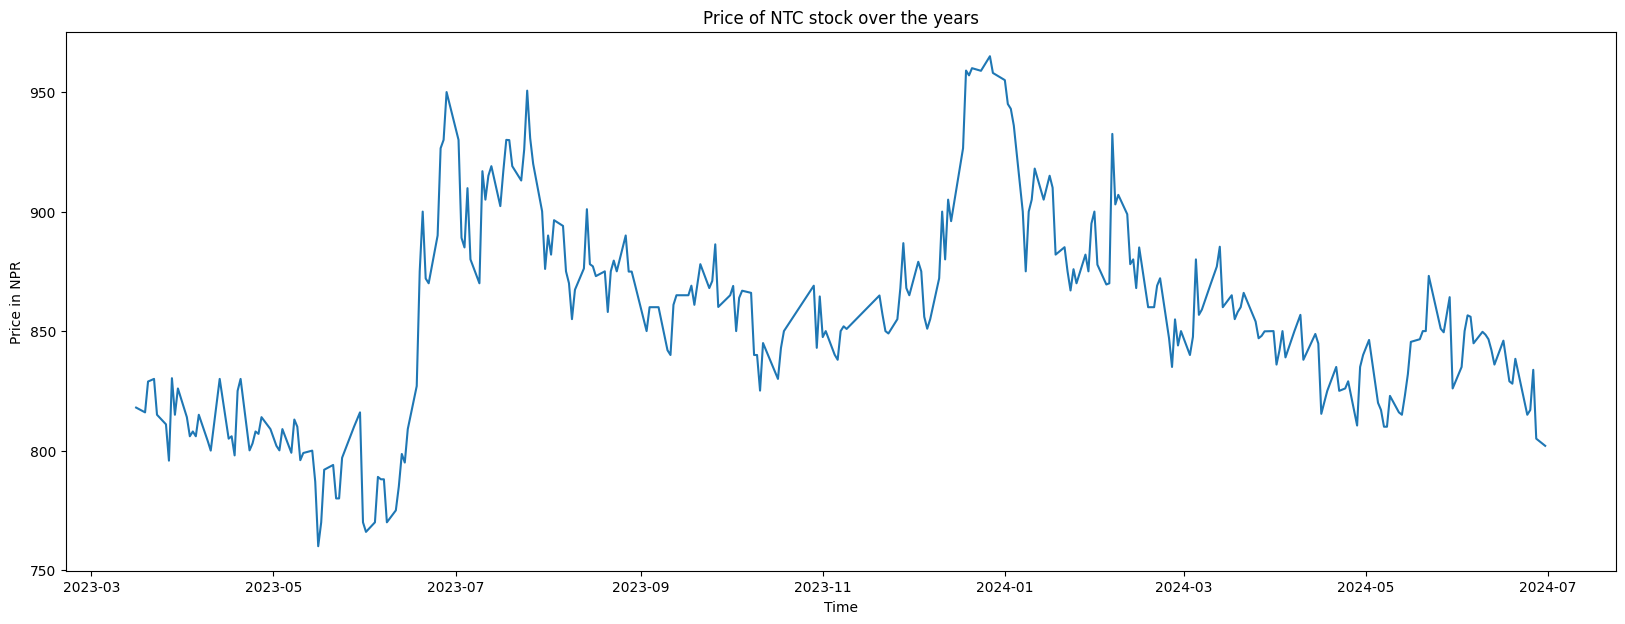

In [45]:
plt.figure(figsize=(20,7))
plt.title("Price of NTC stock over the years")
plt.plot(df['2023-03-16':'2024-06-30'])
plt.ylabel("Price in NPR")
plt.xlabel("Time")

Text(0.5, 0, 'Time')

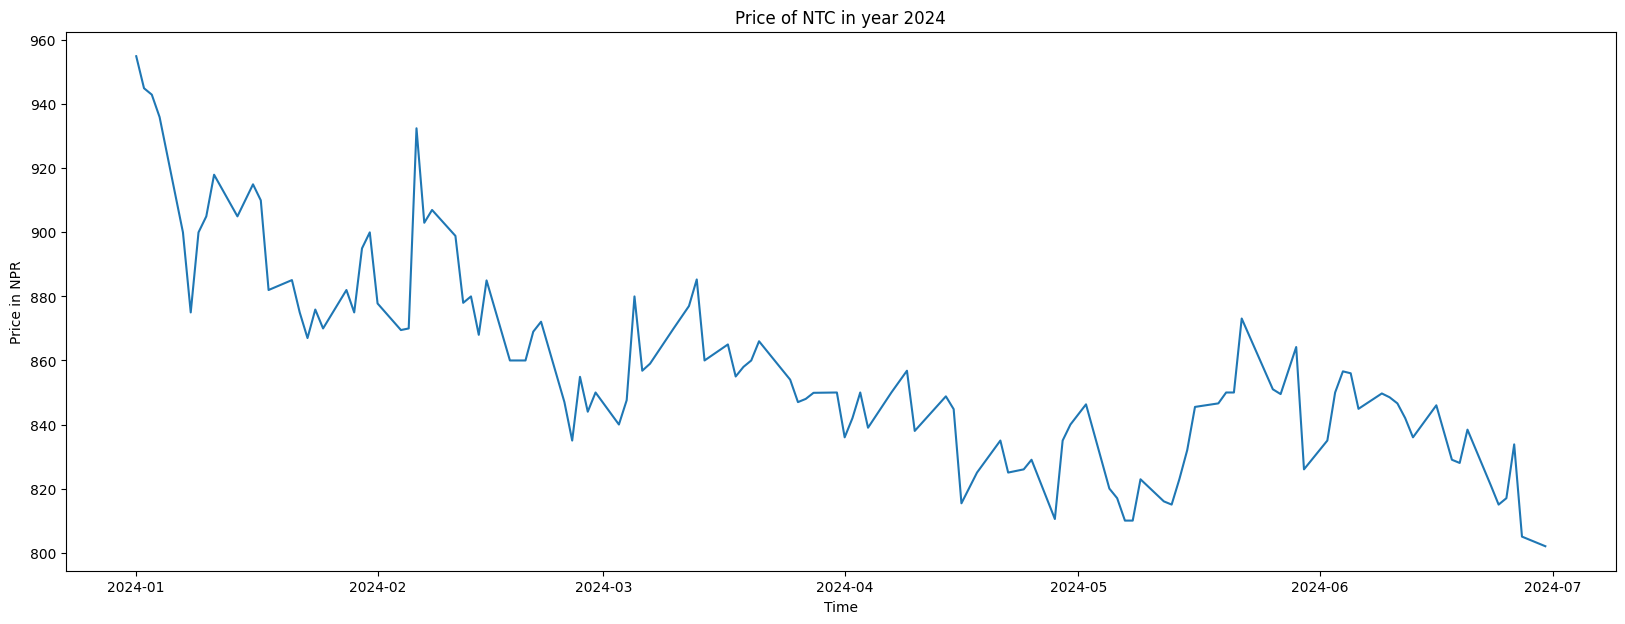

In [46]:
plt.figure(figsize=(20,7))
plt.title("Price of NTC in year 2024")
plt.plot(df['2024-01-01':'2024-06-30'])
plt.ylabel("Price in NPR")
plt.xlabel("Time")

In [47]:
df['50_MA'] = df['Open'].rolling(window=50).mean()
df['100_MA'] = df['Open'].rolling(window=100).mean()

In [48]:
df

,Open,50_MA,100_MA
Date,,,
2023-03-16,818.0,NaN,NaN
2023-03-19,816.0,NaN,NaN
2023-03-20,828.9,NaN,NaN
2023-03-22,830.0,NaN,NaN
2023-03-23,815.0,NaN,NaN
...,...,...,...
2024-06-24,815.0,836.582,851.872
2024-06-25,817.0,836.142,851.292
2024-06-26,833.8,835.818,850.960


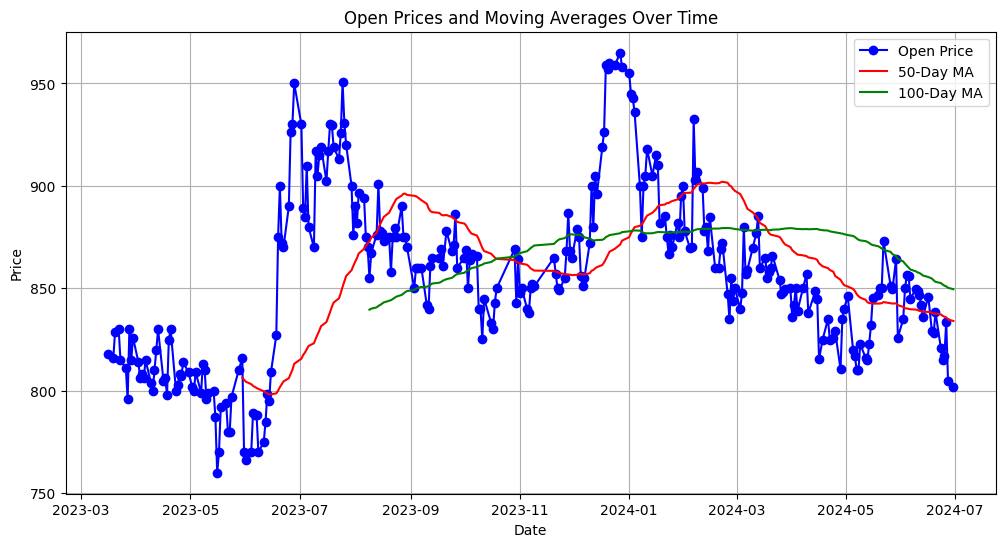

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Open'], marker='o', linestyle='-', color='b', label='Open Price')
plt.plot(df.index, df['50_MA'], linestyle='-', color='r', label='50-Day MA')
plt.plot(df.index, df['100_MA'], linestyle='-', color='g', label='100-Day MA')
plt.title('Open Prices and Moving Averages Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## MODEL TRAINING

In [75]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [51]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Open']])

In [52]:
scaled_data

array([[0.28292683],
       [0.27317073],
       [0.33609756],
       [0.34146341],
       [0.26829268],
       [0.24878049],
       [0.17463415],
       [0.34292683],
       [0.26829268],
       [0.32195122],
       [0.26341463],
       [0.22439024],
       [0.23414634],
       [0.22439024],
       [0.26829268],
       [0.21463415],
       [0.19512195],
       [0.24390244],
       [0.29268293],
       [0.34146341],
       [0.2195122 ],
       [0.22439024],
       [0.18536585],
       [0.31707317],
       [0.34146341],
       [0.19560976],
       [0.2097561 ],
       [0.23414634],
       [0.22926829],
       [0.26341463],
       [0.23902439],
       [0.20487805],
       [0.19560976],
       [0.23902439],
       [0.19073171],
       [0.25853659],
       [0.24390244],
       [0.17560976],
       [0.1902439 ],
       [0.19512195],
       [0.13170732],
       [0.        ],
       [0.04878049],
       [0.15609756],
       [0.16585366],
       [0.09756098],
       [0.09756098],
       [0.180

In [53]:
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)


In [54]:
seq_length = 50 
X, y = create_sequences(scaled_data, seq_length)


In [55]:
X

array([[[0.28292683],
        [0.27317073],
        [0.33609756],
        ...,
        [0.1804878 ],
        [0.24390244],
        [0.27317073]],

       [[0.27317073],
        [0.33609756],
        [0.34146341],
        ...,
        [0.24390244],
        [0.27317073],
        [0.04878049]],

       [[0.33609756],
        [0.34146341],
        [0.26829268],
        ...,
        [0.27317073],
        [0.04878049],
        [0.02926829]],

       ...,

       [[0.43902439],
        [0.47219512],
        [0.3804878 ],
        ...,
        [0.29756098],
        [0.26829268],
        [0.27804878]],

       [[0.47219512],
        [0.3804878 ],
        [0.43317073],
        ...,
        [0.26829268],
        [0.27804878],
        [0.36      ]],

       [[0.3804878 ],
        [0.43317073],
        [0.41365854],
        ...,
        [0.27804878],
        [0.36      ],
        [0.2195122 ]]])

In [56]:
y

array([[0.04878049],
       [0.02926829],
       [0.04878049],
       [0.14146341],
       [0.13658537],
       [0.13658537],
       [0.04878049],
       [0.07317073],
       [0.12195122],
       [0.18829268],
       [0.17073171],
       [0.23902439],
       [0.32682927],
       [0.56097561],
       [0.68292683],
       [0.54634146],
       [0.53658537],
       [0.63414634],
       [0.81219512],
       [0.82926829],
       [0.92682927],
       [0.82926829],
       [0.62926829],
       [0.6097561 ],
       [0.73073171],
       [0.58536585],
       [0.53658537],
       [0.76536585],
       [0.70731707],
       [0.75609756],
       [0.77560976],
       [0.69414634],
       [0.76536585],
       [0.82926829],
       [0.82878049],
       [0.77560976],
       [0.74634146],
       [0.8097561 ],
       [0.9297561 ],
       [0.83268293],
       [0.7804878 ],
       [0.68341463],
       [0.56585366],
       [0.63414634],
       [0.59512195],
       [0.66536585],
       [0.65365854],
       [0.560

In [57]:
# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [59]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(200, 50, 1) (50, 50, 1)
(200, 1) (50, 1)


### BUILD MODEL ARCH

In [77]:
model = Sequential()

model.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=30, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=20, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1))

In [78]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 50, 30)         │         9,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 50, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 20)             │         4,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,641 (96.25 KB)

 Trainable params: 24,641 (96.25 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [80]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('Stock_Price_Predicton-main/best_model.keras', save_best_only=True, monitor='val_loss')

In [82]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - loss: 0.3115 - mean_absolute_error: 0.5256 - val_loss: 0.0322 - val_mean_absolute_error: 0.1593
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.1026 - mean_absolute_error: 0.2606 - val_loss: 0.0803 - val_mean_absolute_error: 0.2682
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0663 - mean_absolute_error: 0.2231 - val_loss: 0.0193 - val_mean_absolute_error: 0.1161
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0356 - mean_absolute_error: 0.1489 - val_loss: 0.0120 - val_mean_absolute_error: 0.0900
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0340 - mean_absolute_error: 0.1391 - val_loss: 0.0290 - val_mean_absolute_error: 0.1507
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0376 - mean_absolute_error: 0.1558 - val_loss: 0.0225 - val_mean_absolute_error: 0.1288
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0345 - mean_absolute_error: 0.1462 - val_loss: 0.0183 - va

In [84]:
model.save('NTC_stock.keras')

In [85]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0120 - mean_absolute_error: 0.0911
Test Loss: 0.011996137909591198
Test MAE: 0.08999603986740112


In [88]:
predictions = model.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [89]:
# Inverse transform the predictions and the actual values if they were scaled
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))



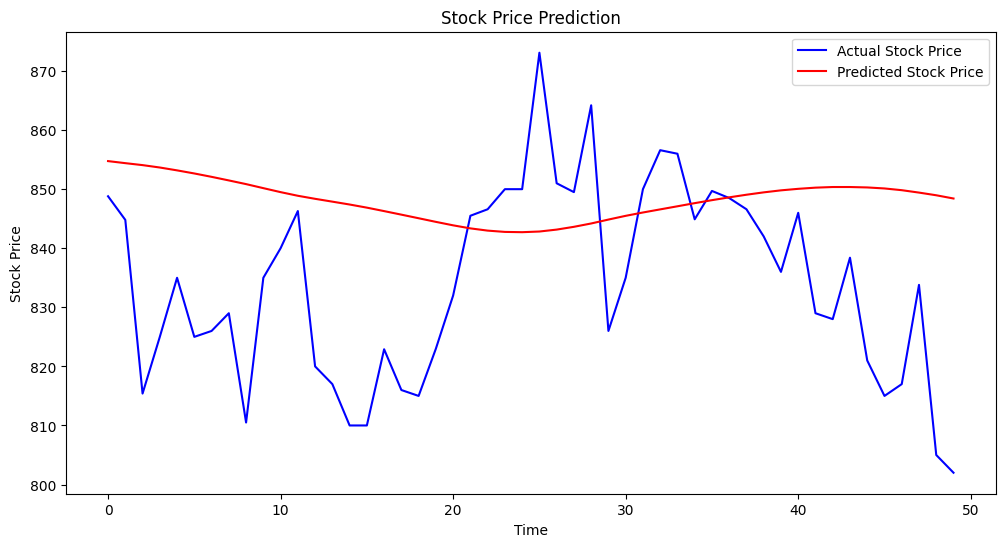

In [90]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()